In [1]:
using LinearAlgebra
using Statistics
using Random
using Plots
gr()

Plots.GRBackend()

## 図5.7のプログラム

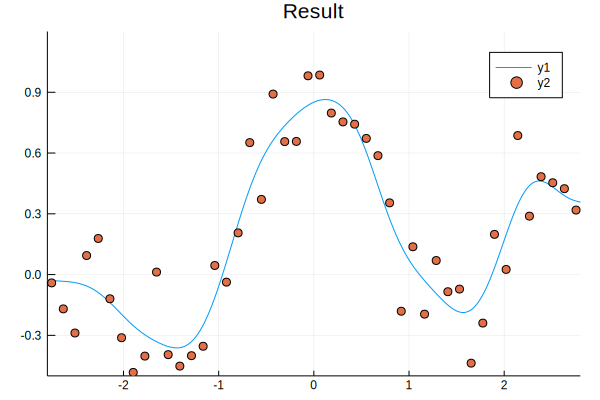

In [15]:
n = 50
N = 1000

x = range(-3, stop=3, length=n)
X = range(-3, stop=3, length=N)
pix = pi * x
y = sin.(pix) ./ (pix) + 0.1 * x + 0.2 * randn(n, 1)

hh = 2 * 0.3 ^ 2
l = 0.1
t0 = randn(n, 1)
x2 = x .^ 2

k = exp.(-(repeat(x2, 1, n) + repeat(x2', n, 1) - 2 * x * x') / hh)
k2 = k ^ 2
ky = k * y

for o in 1:1000
    t = (k2 + l * pinv(diagm(0 => dropdims(abs.(t0), dims=2)))) \ ky
    if norm(t - t0) < 0.001
        t0 = t
        break
    end
    t0 = t
end

K = exp.(-(repeat(X .^ 2, 1, n) + repeat(x2', N, 1) - 2 * X * x') / hh)
F = K * t0

plot(X, F, xlim=(-2.8, 2.8), ylim=(-0.5, 1.2))
title!("Result")
plot!(x, y, st=:scatter)

In [20]:
sum(t0 .< (10 ^ -3))

41